In [1]:
import pandas as pd
import numpy as np
import polars as pl

In [ ]:
# vamos a trabajar el dataframe con pandas y con polars

In [34]:
df = pd.read_excel('../data/ind_rentabilidad_hotelera_ccaa.xlsx', engine='openpyxl')

In [3]:
dfp = pl.from_pandas(df) # obviamente también se puede dfp = pl.read_excel('../data/ind_rentabilidad_hotelera_ccaa.xlsx')

In [35]:
df.head(20)

,AÑO,MES,CCAA,INDICADOR_ADR,TASA_VARIACION_ADR,INDICADOR_RVPAR,TASA_VARIACION_RVPAR
0,2008,1,Región de Murcia,64.63,0.00,22.76,0.00
1,2008,2,Región de Murcia,62.72,0.00,30.23,0.00
2,2008,3,Región de Murcia,63.76,0.00,32.53,0.00
3,2008,4,Región de Murcia,63.42,0.00,29.43,0.00
4,2008,5,Región de Murcia,62.95,0.00,31.59,0.00
5,2008,6,Región de Murcia,67.74,0.00,33.65,0.00
6,2008,7,Región de Murcia,78.89,0.00,42.21,0.00
7,2008,8,Región de Murcia,85.51,0.00,48.16,0.00
8,2008,9,Región de Murcia,72.69,0.00,38.24,0.00
9,2008,10,Región de Murcia,67.20,0.00,33.00,0.00


In [5]:
print(dfp.head)

<bound method DataFrame.head of shape: (191, 7)
┌──────┬─────┬───────────┬───────────────┬───────────────────┬──────────────────┬──────────────────┐
│ AÑO  ┆ MES ┆ CCAA      ┆ INDICADOR_ADR ┆ TASA_VARIACION_AD ┆ INDICADOR_RVPAR  ┆ TASA_VARIACION_R │
│ ---  ┆ --- ┆ ---       ┆ ---           ┆ R                 ┆ ---              ┆ VPAR             │
│ i64  ┆ i64 ┆ str       ┆ f64           ┆ ---               ┆ f64              ┆ ---              │
│      ┆     ┆           ┆               ┆ f64               ┆                  ┆ f64              │
╞══════╪═════╪═══════════╪═══════════════╪═══════════════════╪══════════════════╪══════════════════╡
│ 2008 ┆ 1   ┆ Región de ┆ 64.63         ┆ 0.0               ┆ 22.76            ┆ 0.0              │
│      ┆     ┆ Murcia    ┆               ┆                   ┆                  ┆                  │
│ 2008 ┆ 2   ┆ Región de ┆ 62.72         ┆ 0.0               ┆ 30.23            ┆ 0.0              │
│      ┆     ┆ Murcia    ┆               ┆ 

Glosario sobre el dataset:  

RevPAR: Ingresos por habitación disponible. Se calcula dividiendo los ingresos totales por habitaciones por el número de habitaciones disponibles.  

ADR: Tarifa media diaria. Se calcula dividiendo los ingresos totales por habitaciones por el número de habitaciones ocupadas.  

Como vemos, se añade en el dataset la tasa de variación de ambos valores

In [36]:
df.dtypes

AÑO                       int64
MES                       int64
CCAA                     object
INDICADOR_ADR           float64
TASA_VARIACION_ADR      float64
INDICADOR_RVPAR         float64
TASA_VARIACION_RVPAR    float64
dtype: object

In [7]:
print(dfp.dtypes)

[Int64, Int64, String, Float64, Float64, Float64, Float64]


In [37]:
df = df.drop(columns=['CCAA']) # o lo que es lo mismo df = df.drop('CCAA', axis=1)

In [9]:
dfp = dfp.drop('CCAA')

In [38]:
df.isnull().sum()

AÑO                     0
MES                     0
INDICADOR_ADR           0
TASA_VARIACION_ADR      0
INDICADOR_RVPAR         0
TASA_VARIACION_RVPAR    0
dtype: int64

In [11]:
# polars - vamos a complicar un poco el código para hacer conteo de nulos
null_counts = dfp.with_columns([pl.col(column).is_null().sum().alias(f"{column}_null_count") for column in dfp.columns])


In [12]:
for column in dfp.columns:
    print(f"{column} null count: {dfp.select(pl.col(column).is_null().sum())}")

AÑO null count: shape: (1, 1)
┌─────┐
│ AÑO │
│ --- │
│ u32 │
╞═════╡
│ 0   │
└─────┘
MES null count: shape: (1, 1)
┌─────┐
│ MES │
│ --- │
│ u32 │
╞═════╡
│ 0   │
└─────┘
INDICADOR_ADR null count: shape: (1, 1)
┌───────────────┐
│ INDICADOR_ADR │
│ ---           │
│ u32           │
╞═══════════════╡
│ 0             │
└───────────────┘
TASA_VARIACION_ADR null count: shape: (1, 1)
┌────────────────────┐
│ TASA_VARIACION_ADR │
│ ---                │
│ u32                │
╞════════════════════╡
│ 0                  │
└────────────────────┘
INDICADOR_RVPAR null count: shape: (1, 1)
┌─────────────────┐
│ INDICADOR_RVPAR │
│ ---             │
│ u32             │
╞═════════════════╡
│ 0               │
└─────────────────┘
TASA_VARIACION_RVPAR null count: shape: (1, 1)
┌──────────────────────┐
│ TASA_VARIACION_RVPAR │
│ ---                  │
│ u32                  │
╞══════════════════════╡
│ 0                    │
└──────────────────────┘


In [39]:
# vamos a ver si faltan datos en las fechas
# vemos si faltan meses
conteo_meses_por_año = df.groupby('AÑO')['MES'].nunique()

print(conteo_meses_por_año)


AÑO
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2022    12
2023    11
Name: MES, dtype: int64


In [14]:
dfp.head

<bound method DataFrame.head of shape: (191, 6)
┌──────┬─────┬───────────────┬────────────────────┬─────────────────┬──────────────────────┐
│ AÑO  ┆ MES ┆ INDICADOR_ADR ┆ TASA_VARIACION_ADR ┆ INDICADOR_RVPAR ┆ TASA_VARIACION_RVPAR │
│ ---  ┆ --- ┆ ---           ┆ ---                ┆ ---             ┆ ---                  │
│ i64  ┆ i64 ┆ f64           ┆ f64                ┆ f64             ┆ f64                  │
╞══════╪═════╪═══════════════╪════════════════════╪═════════════════╪══════════════════════╡
│ 2008 ┆ 1   ┆ 64.63         ┆ 0.0                ┆ 22.76           ┆ 0.0                  │
│ 2008 ┆ 2   ┆ 62.72         ┆ 0.0                ┆ 30.23           ┆ 0.0                  │
│ 2008 ┆ 3   ┆ 63.76         ┆ 0.0                ┆ 32.53           ┆ 0.0                  │
│ 2008 ┆ 4   ┆ 63.42         ┆ 0.0                ┆ 29.43           ┆ 0.0                  │
│ 2008 ┆ 5   ┆ 62.95         ┆ 0.0                ┆ 31.59           ┆ 0.0                  │
│ …    ┆ …   ┆ …      

In [ ]:
# pandas - vamos a hacer como en otros notebooks, pasar año y mes a una sola columna y pasarlo al index


In [23]:
# polars - vamos a realizar la conversión a datetime de 'AÑO' y 'MES'
dfp = dfp.with_columns([
    pl.concat_str([
        pl.col("MES").cast(str).str.zfill(2),  # Asegura que el mes tenga dos dígitos
        pl.lit("-"),
        pl.col("AÑO").cast(str),
        pl.lit("-01")  # Añadir un día ficticio para completar el formato de fecha
    ]).str.strptime(pl.Datetime, "%m-%Y-%d").alias("FECHA")
])

dfp.head(5)

AÑO,MES,INDICADOR_ADR,TASA_VARIACION_ADR,INDICADOR_RVPAR,TASA_VARIACION_RVPAR,FECHA
i64,i64,f64,f64,f64,f64,datetime[μs]
2008,1,64.63,0.0,22.76,0.0,2008-01-01 00:00:00
2008,2,62.72,0.0,30.23,0.0,2008-02-01 00:00:00
2008,3,63.76,0.0,32.53,0.0,2008-03-01 00:00:00
2008,4,63.42,0.0,29.43,0.0,2008-04-01 00:00:00
2008,5,62.95,0.0,31.59,0.0,2008-05-01 00:00:00


In [20]:
# ahora dropeamos 'AÑO' y 'MES'
dfp = dfp.drop(["AÑO", "MES"])

In [40]:
# pandas - vamos a hacer las operaciones para establecer fecha y pasar al index

# queremos que las columnas MES y AÑO son de tipo string y que MES tenga dos dígitos
df['MES'] = df['MES'].astype(str).str.zfill(2)
df['AÑO'] = df['AÑO'].astype(str)

# Creamos la nueva columna FECHA usando las columnas MES y AÑO
df['FECHA'] = pd.to_datetime(df['MES'] + '-' + df['AÑO'] + '-01', format='%m-%Y-%d')

print(df.head(5))

    AÑO MES  INDICADOR_ADR  TASA_VARIACION_ADR  INDICADOR_RVPAR  \
0  2008  01          64.63                 0.0            22.76   
1  2008  02          62.72                 0.0            30.23   
2  2008  03          63.76                 0.0            32.53   
3  2008  04          63.42                 0.0            29.43   
4  2008  05          62.95                 0.0            31.59   

   TASA_VARIACION_RVPAR      FECHA  
0                   0.0 2008-01-01  
1                   0.0 2008-02-01  
2                   0.0 2008-03-01  
3                   0.0 2008-04-01  
4                   0.0 2008-05-01  


In [41]:
# dropeamos año y mes, y pasamos datetime al index
df = df.drop(columns=['AÑO','MES'])
df.set_index('FECHA', inplace=True)

In [42]:
# aunque pandas infiere la frecuencia más adecuada basada en las fechas presentes
# para asegurar una frecuencia mensual puedes reindexar el DataFrame con un nuevo rango de fechas si es necesario

# Creamos un rango de fechas mensuales desde la fecha mínima hasta la máxima en el índice
fecha_inicio = df.index.min()
fecha_fin = df.index.max()
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='MS')

# Reindexamos el df para asegurar todas las fechas mensuales, opcionalmente llenando valores faltantes
df = df.reindex(rango_fechas)

# Ahora df tiene un índice de fecha y hora con frecuencia mensual
print(df.head())

            INDICADOR_ADR  TASA_VARIACION_ADR  INDICADOR_RVPAR  \
2008-01-01          64.63                 0.0            22.76   
2008-02-01          62.72                 0.0            30.23   
2008-03-01          63.76                 0.0            32.53   
2008-04-01          63.42                 0.0            29.43   
2008-05-01          62.95                 0.0            31.59   

            TASA_VARIACION_RVPAR  
2008-01-01                   0.0  
2008-02-01                   0.0  
2008-03-01                   0.0  
2008-04-01                   0.0  
2008-05-01                   0.0  


In [43]:
# vamos a asegurarnos que esta reindexación no ha generado valores nulos
df.isnull().sum()

INDICADOR_ADR           0
TASA_VARIACION_ADR      0
INDICADOR_RVPAR         0
TASA_VARIACION_RVPAR    0
dtype: int64

In [44]:
# ahora renombramos columnas para mejor visualización. vamos a quitar las mayúsculas y quitar el guión bajo
def transformar_nombre_columna(col):
    return col.replace('_', ' ').title()

# Renombramos las columnas usando la función definida
df.rename(columns=lambda x: transformar_nombre_columna(x), inplace=True)

# vemos los nuevos nombres de las columnas
print(df.columns)


Index(['Indicador Adr', 'Tasa Variacion Adr', 'Indicador Rvpar',
       'Tasa Variacion Rvpar'],
      dtype='object')


In [45]:
# vamos a graficar los indicadores: Indicador Adr. Según observamos en el glosario de términos turísticos:
# El indicador ADR (Average Daily Rate o Tarifa Media Diaria) esla estimación de la tarifa media diaria de una habitación doble con baño, 
# sin incluir impuestos ni ningún otro servicio, en los hoteles de España.
# El ADR se calcula dividiendo los ingresos totales por habitaciones por el número de habitaciones ocupadas. Es decir:
# ADR = Ingresos totales por habitaciones / Habitaciones ocupadas
# El ADR es un indicador importante de la rentabilidad hotelera, ya que mide la capacidad de los hoteles para generar 
# ingresos por habitación ocupada. Un ADR alto puede indicar que un hotel está siendo eficiente en la gestión de sus precios o que está 
# ubicado en un mercado con una alta demanda de alojamiento.
# El ADR se utiliza junto con otros indicadores, como el RevPAR (Ingresos por Habitación Disponible) y la Ocupación, para calcular el índice 
# de rentabilidad hotelera.

In [46]:
import matplotlib.pyplot as plt

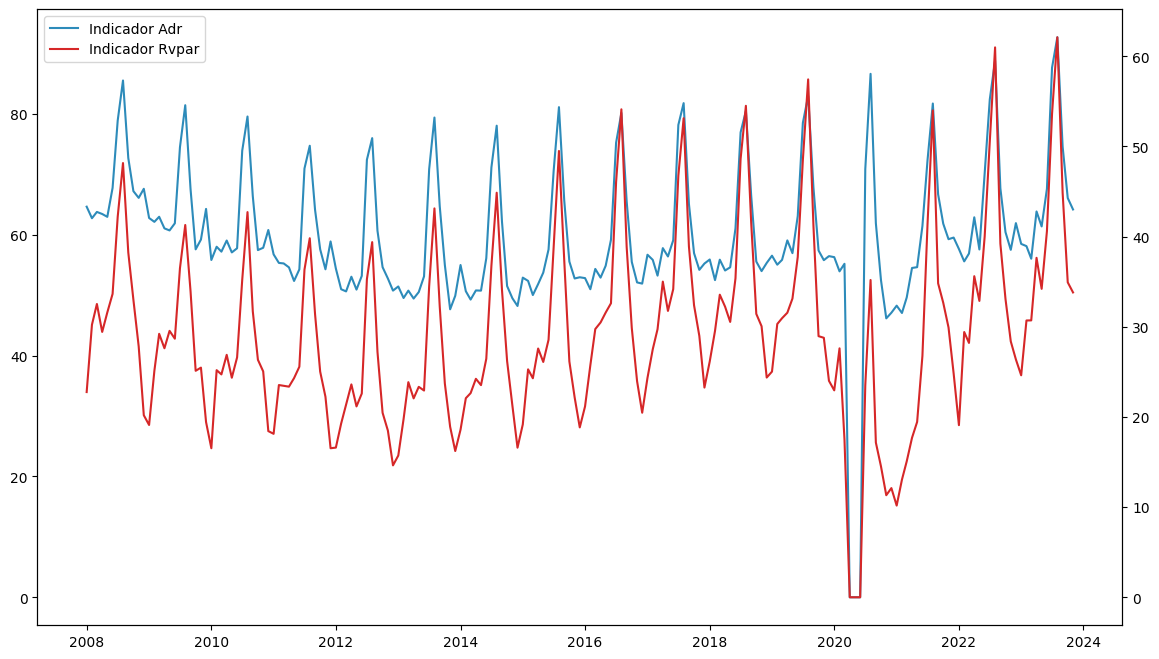

In [50]:
# Creamos figura y eje
fig, ax1 = plt.subplots(figsize=(14,8))

# Configuramos el eje x para el tiempo (index)
ax1.set_xlabel('')
ax1.set_ylabel('', color='#2d8bba')

# Graficamos "Indicador Adr" en el primer eje y
line1 = ax1.plot(df.index, df['Indicador Adr'], label='Indicador Adr', color='#2d8bba')

# Segundo eje y que comparte el mismo eje x
ax2 = ax1.twinx()  
ax2.set_ylabel('', color='tab:red')  

# Graficamos "Indicador Rvpar" en el segundo eje y
line2 = ax2.plot(df.index, df['Indicador Rvpar'], label='Indicador Rvpar', color='tab:red')

# ponemos leyendas combinadas (esto no hace falta)
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.show()


In [ ]:
# vamos a realizar algo diferente a lo conocido. me han recomendado una red neuronal que es muy buena para series temporales.
# se llama timegpt-1 - neuralforecast 
# en su github ponen este código de ejemplo:

# from neuralforecast import NeuralForecast
# from neuralforecast.models import NBEATS
# from neuralforecast.utils import AirPassengersDF

# nf = NeuralForecast(
#     models = [NBEATS(input_size=24, h=12, max_steps=100)],
#     freq = 'M'
# )

# nf.fit(df=AirPassengersDF)
# nf.predict()

# vamos a emplearlo para nuestro código

In [60]:
# primero preparamos el dataframe según instrucciones de NF
# reseteamos el index
df_reset = df.reset_index()

In [61]:
df_reset

,index,Indicador Adr,Tasa Variacion Adr,Indicador Rvpar,Tasa Variacion Rvpar
0,2008-01-01,64.63,0.00,22.76,0.00
1,2008-02-01,62.72,0.00,30.23,0.00
2,2008-03-01,63.76,0.00,32.53,0.00
3,2008-04-01,63.42,0.00,29.43,0.00
4,2008-05-01,62.95,0.00,31.59,0.00
...,...,...,...,...,...
186,2023-07-01,87.64,6.38,53.64,6.07
187,2023-08-01,92.66,4.34,62.11,1.82
188,2023-09-01,74.58,10.20,44.88,14.43
189,2023-10-01,66.06,9.33,34.93,5.55


In [66]:
# importamos librerías
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS

In [62]:
# Ahora, 'df_reset' tiene una columna adicional al principio que representa el índice de tiempo anterior (FECHA)
# Renombrar las columnas adecuadamente: 'ds' para el tiempo y 'y' para 'Indicador Adr'
df_reset.rename(columns={'index': 'ds', 'Indicador Adr': 'y'}, inplace=True)

In [63]:
df_reset

,ds,y,Tasa Variacion Adr,Indicador Rvpar,Tasa Variacion Rvpar
0,2008-01-01,64.63,0.00,22.76,0.00
1,2008-02-01,62.72,0.00,30.23,0.00
2,2008-03-01,63.76,0.00,32.53,0.00
3,2008-04-01,63.42,0.00,29.43,0.00
4,2008-05-01,62.95,0.00,31.59,0.00
...,...,...,...,...,...
186,2023-07-01,87.64,6.38,53.64,6.07
187,2023-08-01,92.66,4.34,62.11,1.82
188,2023-09-01,74.58,10.20,44.88,14.43
189,2023-10-01,66.06,9.33,34.93,5.55


In [64]:
# nos tenemos que asegurar de que solo estén las columnas ds, y, dropeamos en resto
df_reset = df_reset.drop(columns=['Tasa Variacion Adr', 'Indicador Rvpar', 'Tasa Variacion Rvpar'])

In [65]:
# pasar solo estas dos columnas a NeuralForecast
df_for_forecast = df_reset[['ds', 'y']]

In [68]:
# Agregar una columna 'unique_id' que identifique la serie temporal
df_for_forecast['unique_id'] = 'Indicador_Adr_Serie'

In [69]:
# El índice de 'df' ya está en formato datetime y es mensual ('M')
# NeuralForecast espera una columna 'ds' para la fecha y 'y' para los valores

nf = NeuralForecast(
    models = [NBEATS(input_size=24, h=12, max_steps=100)],  # Ajustados estos para la predicción de 12 meses
    freq = 'M'  # Frecuencia mensual
)

# DataFrame esté en el formato esperado por NeuralForecast
nf.fit(df=df_for_forecast)
predictions = nf.predict() # 'predictions' contendrá las predicciones para los próximos 12 meses


Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

In [73]:
# parece que todo ha ido OK, vamos a graficar los resultados
# vamos a ver qué tipo de datos devuelve 'predictions' 
print(predictions.head())

                            ds     NBEATS
unique_id                                
Indicador_Adr_Serie 2023-11-30  64.847023
Indicador_Adr_Serie 2023-12-31  62.387688
Indicador_Adr_Serie 2024-01-31  60.046680
Indicador_Adr_Serie 2024-02-29  62.358810
Indicador_Adr_Serie 2024-03-31  63.400951


In [77]:
df_for_forecast

y            float64
unique_id     object
dtype: object

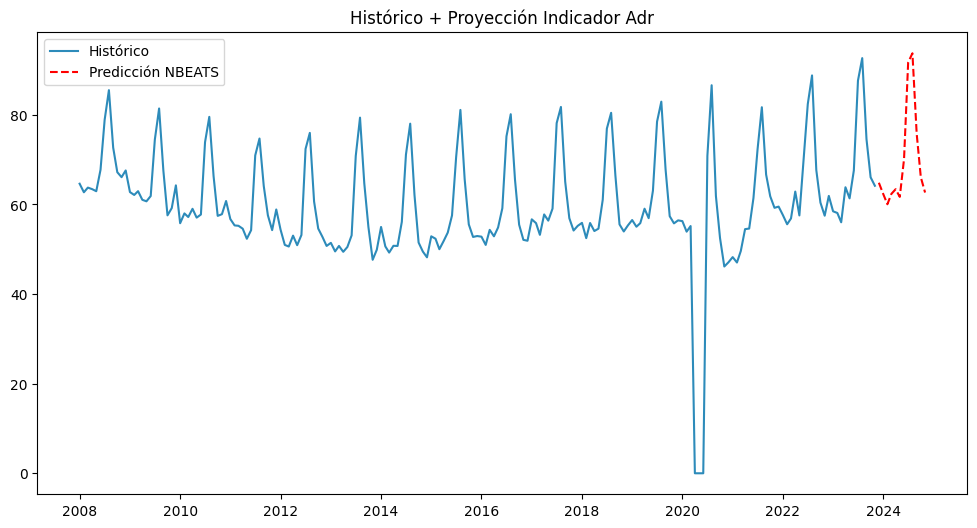

In [79]:
# Asegúrate de que 'predictions' tiene 'ds' en formato datetime
# predictions['ds'] = pd.to_datetime(predictions['ds'])

# Asegúrate de que 'df_for_forecast' también esté adecuadamente indexado por 'ds'
# Si 'df_for_forecast' ya no tiene la columna 'ds', asegúrate de resetear el índice o ajustar según tu situación actual
# df_for_forecast.reset_index(inplace=True)
# df_for_forecast.rename(columns={'index': 'ds'}, inplace=True)
# df_for_forecast['ds'] = pd.to_datetime(df_for_forecast['ds'])
# df_for_forecast.set_index('ds', inplace=True)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_for_forecast.index, df_for_forecast['y'], label='Histórico', color='#2d8bba')
plt.plot(predictions['ds'], predictions['NBEATS'], label='Predicción NBEATS', linestyle='--', color='red')
plt.title('Histórico + Proyección Indicador Adr')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [80]:
# vamos a ver la efectividad del modelo. 